 # Итоговый проект // Лашков Илья // Анализ телеграм каналов транспорта Москвы

Импортируем необходимые библиотеки

In [310]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import re
import calendar
dorder = list(calendar.day_name)
morder = list(calendar.month_name)

Для создания проекта было экспортирована история 3 телеграм каналов :
  - Дептранс Москвы 
  - Дептранс Оперативно 
  - Велобайк

Преобразовываем данные JSON в словарь словарей, а далее создаем датафрейм

In [311]:
cd "/Users/wilyash/Downloads/Telegram Desktop/DT_ChatExport_2025-03-24"

/Users/wilyash/Downloads/Telegram Desktop/DT_ChatExport_2025-03-24


In [312]:
f1 = open('result.json', 'r', encoding='utf-8')
data1 = json.load(f1)
f1.close()

In [313]:
d1 = {'date':[], 'from':[], 'text':[]}

for message in data1['messages']:
    if message['type'] == 'message':
        d1['date'].append(message['date'])
        d1['from'].append(message['from_id'])
        if 'text' in message:
            d1['text'].append(message['text'])
        else:
            d1['text'].append('')
    else:
        print(message) 

In [314]:
df1 = pd.DataFrame(d1)

In [315]:
df1 = df1[df1['text'] != ''] 

In [316]:
df1['date'] = pd.to_datetime(df1['date'], format='%Y-%m-%dT%H:%M:%S')
df1['from'].replace({'channel1029095426':'Дептранс_Москвы'}, inplace=True)

Готов датафрейм канала "Дептранс Москвы", аналогичная операция для канала "Дептранс.Оперативно"

In [317]:
cd "/Users/wilyash/Downloads/Telegram Desktop/DTO_ChatExport_2025-03-24"

/Users/wilyash/Downloads/Telegram Desktop/DTO_ChatExport_2025-03-24


In [318]:
f2 = open('result.json', 'r', encoding='utf-8')
data2 = json.load(f2)
f2.close()

In [319]:
d2 = {'date':[], 'from':[], 'text':[]}

for message in data2['messages']:
    if message['type'] == 'message':
        d2['date'].append(message['date'])
        d2['from'].append(message['from_id'])
        if 'text' in message:
            d2['text'].append(message['text'])
        else:
            d2['text'].append('')
    else:
        print(message) 

In [320]:
df2 = pd.DataFrame(d2)

In [321]:
df2 = df2[df2['text'] != ''] 

In [322]:
df2['date'] = pd.to_datetime(df2['date'], format='%Y-%m-%dT%H:%M:%S')
df2['from'].replace({'channel1031559169':'Дептранс_Оперативно'}, inplace=True)

И для канала "Велобайк" также приобразовываем данные

In [323]:
cd "/Users/wilyash/Downloads/Telegram Desktop/VB_ChatExport_2025-03-24"

/Users/wilyash/Downloads/Telegram Desktop/VB_ChatExport_2025-03-24


In [324]:
f3 = open('result.json', 'r', encoding='utf-8')
data3 = json.load(f3)
f3.close()

In [325]:
d3 = {'date':[], 'from':[], 'text':[]}

for message in data3['messages']:
    if message['type'] == 'message':
        d3['date'].append(message['date'])
        d3['from'].append(message['from_id'])
        if 'text' in message:
            d3['text'].append(message['text'])
        else:
            d3['text'].append('')
    else:
        print(message) 

In [326]:
df3 = pd.DataFrame(d3)

In [327]:
df3 = df3[df3['text'] != ''] 

In [328]:
df3['date'] = pd.to_datetime(df3['date'], format='%Y-%m-%dT%H:%M:%S')
df3['from'].replace({'channel1676365391':'Велобайк'}, inplace=True)

3 датафрейма готовы, следующим действием соединяем их в один.

In [329]:
dfs = pd.concat([df1, df2, df3], axis=0)

Производим сортировку по дате, чтобы данные были в хронологическом порядке 

In [330]:
dfs = dfs.sort_values(by='date')

Добавляем признаки дня недели, часа отправки сообщения, месяца и длинны сообщения для дальнейшего анализа

In [331]:
dfs['day_of_week'] = dfs['date'].dt.day_name()

In [332]:
dfs['month'] = dfs['date'].dt.month_name()

In [333]:
dfs['length'] = dfs['text'].str.len()

In [334]:
dfs['hour'] = pd.to_datetime(dfs['date']).dt.hour

In [335]:
dfs

,date,from,text,day_of_week,month,length,hour
0,2024-03-24 10:01:07,Дептранс_Оперативно,С 00:01 до 21:00 25 марта на участке Суворовск...,Sunday,March,180,10
1,2024-03-24 10:30:52,Дептранс_Оперативно,С 25 марта до 5 апреля на участке Водопроводно...,Sunday,March,268,10
2,2024-03-24 11:02:01,Дептранс_Оперативно,С 25 марта до 21 мая на участке улицы Линии Ок...,Sunday,March,187,11
0,2024-03-24 11:31:04,Дептранс_Москвы,"Поезда метро, а также автобусы, электробусы и ...",Sunday,March,625,11
1,2024-03-24 12:00:46,Дептранс_Москвы,[Сегодня мы снова дежурим у донорских центров....,Sunday,March,3,12
...,...,...,...,...,...,...,...
3892,2025-03-24 07:29:56,Дептранс_Оперативно,Доброе утро!\n\nВечером возможны локальные зат...,Monday,March,210,7
11004,2025-03-24 07:30:16,Дептранс_Москвы,Доброе утро!\n\nВечером возможны локальные зат...,Monday,March,210,7
11005,2025-03-24 09:01:12,Дептранс_Москвы,[Музей Транспорта Москвы отреставрировал автом...,Monday,March,7,9
11006,2025-03-24 09:31:09,Дептранс_Москвы,"[Мы выпустили новый тематический «Единый», кот...",Monday,March,9,9


In [336]:
dfs

,date,from,text,day_of_week,month,length,hour
0,2024-03-24 10:01:07,Дептранс_Оперативно,С 00:01 до 21:00 25 марта на участке Суворовск...,Sunday,March,180,10
1,2024-03-24 10:30:52,Дептранс_Оперативно,С 25 марта до 5 апреля на участке Водопроводно...,Sunday,March,268,10
2,2024-03-24 11:02:01,Дептранс_Оперативно,С 25 марта до 21 мая на участке улицы Линии Ок...,Sunday,March,187,11
0,2024-03-24 11:31:04,Дептранс_Москвы,"Поезда метро, а также автобусы, электробусы и ...",Sunday,March,625,11
1,2024-03-24 12:00:46,Дептранс_Москвы,[Сегодня мы снова дежурим у донорских центров....,Sunday,March,3,12
...,...,...,...,...,...,...,...
3892,2025-03-24 07:29:56,Дептранс_Оперативно,Доброе утро!\n\nВечером возможны локальные зат...,Monday,March,210,7
11004,2025-03-24 07:30:16,Дептранс_Москвы,Доброе утро!\n\nВечером возможны локальные зат...,Monday,March,210,7
11005,2025-03-24 09:01:12,Дептранс_Москвы,[Музей Транспорта Москвы отреставрировал автом...,Monday,March,7,9
11006,2025-03-24 09:31:09,Дептранс_Москвы,"[Мы выпустили новый тематический «Единый», кот...",Monday,March,9,9


 ### **АНАЛИЗ ДАТАФРЕЙМА**

Для начала я возьму все три канала, и проанализирую в какой час дня публикуется больше всего сообщений.

<Axes: xlabel='hour'>

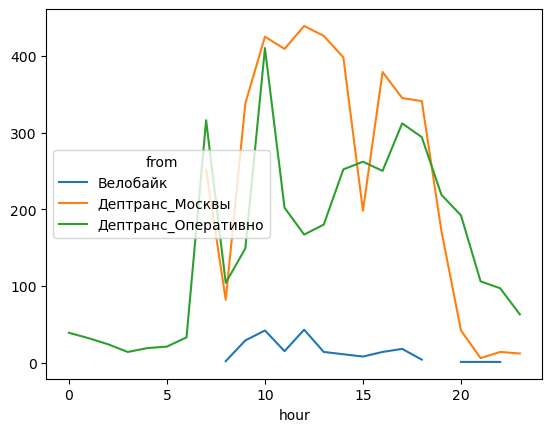

In [337]:
dfs.groupby('hour')['from'].value_counts().unstack().plot()


In [338]:
dfs.groupby('hour')['from'].value_counts().unstack()

from,Велобайк,Дептранс_Москвы,Дептранс_Оперативно
hour,,,
0,NaN,1.0,39.0
1,NaN,NaN,32.0
2,NaN,NaN,24.0
3,NaN,NaN,14.0
4,NaN,NaN,19.0
5,NaN,NaN,21.0
6,NaN,NaN,33.0
7,NaN,251.0,316.0
8,2.0,82.0,104.0


Ознакомившись с графиком и сводной таблицей можно сделать вывод, что наибольший пик приходится на дневное время. У Велобайка и Дептранса это 12 часов дня. У Дептранс.Оперативно это 10 утра. Также можно увидеть, что Дептранс.Оперативно вещает круглосуточно, в то время как другие каналы уходят ночью на перерыв.

In [339]:
dfs.groupby(['day_of_week'])['from'].value_counts().unstack().reindex(dorder)

from,Велобайк,Дептранс_Москвы,Дептранс_Оперативно
day_of_week,,,
Monday,35,604,544
Tuesday,26,610,503
Wednesday,27,683,526
Thursday,32,677,660
Friday,53,716,929
Saturday,21,516,336
Sunday,9,472,259


<Axes: xlabel='day_of_week'>

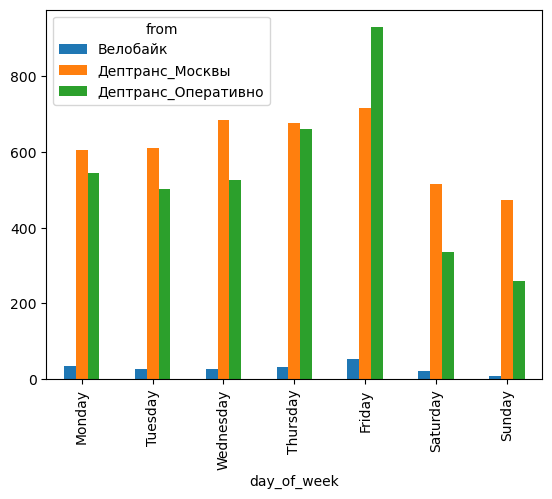

In [340]:
dfs.groupby(['day_of_week'])['from'].value_counts().unstack().reindex(dorder).plot(kind='bar')

Представлена сводная таблица по дням недели. Здесь можно увидеть, что больше всего сообщений было отправлено в пятницу. Здесь пик активности всех трех каналов. Наименьшии показатели также совпадают, Воскресенье - самый неактивный день.

In [341]:
dfs.groupby(['month'])['from'].value_counts().unstack().reindex(morder)


from,Велобайк,Дептранс_Москвы,Дептранс_Оперативно
month,,,
,NaN,NaN,NaN
January,9.0,256.0,205.0
February,7.0,286.0,216.0
March,15.0,322.0,292.0
April,19.0,374.0,302.0
May,21.0,395.0,388.0
June,20.0,374.0,372.0
July,23.0,414.0,321.0
August,16.0,388.0,353.0


<Axes: xlabel='day_of_week'>

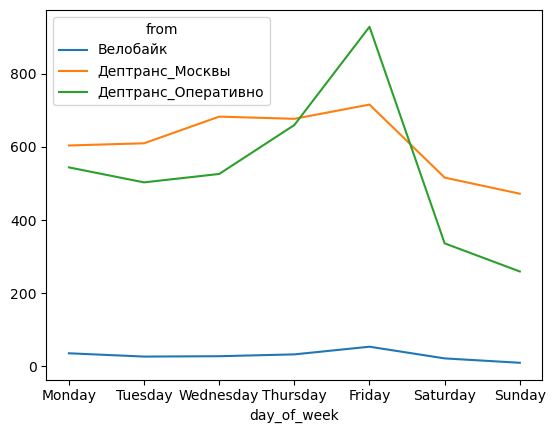

In [342]:
dfs.groupby(['day_of_week'])['from'].value_counts().unstack().reindex(dorder).plot()

Если смотреть на таблицу по месяцам, то у Велобайка можно заметить пик активности с Марта по Ноябрь, те месяцы когда проходил Велосезон. Дептранс Москвы и Дептранс.Оперативно достаточно стабильны в течении года, но оба проявляют наименьшую активность в Январе и Фервале.

### АНАЛИЗ ДАТАФРЕЙМОВ ПО КАНАЛОВ

In [343]:
dfs_vb = dfs[dfs['from'] == 'Велобайк']

<Axes: xlabel='hour'>

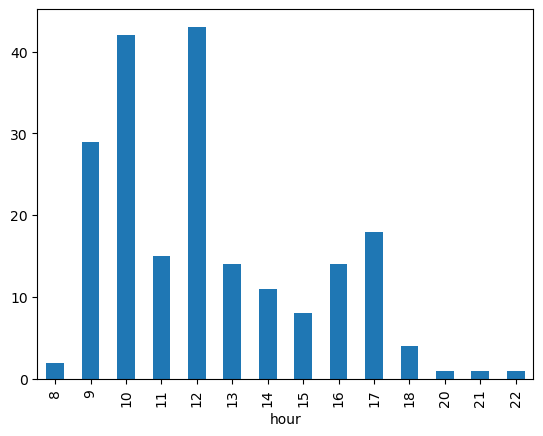

In [344]:
dfs_vb.groupby('hour').size().plot(kind='bar')

In [345]:
dfs_dt = dfs[dfs['from'] == 'Дептранс_Москвы']


<Axes: xlabel='hour'>

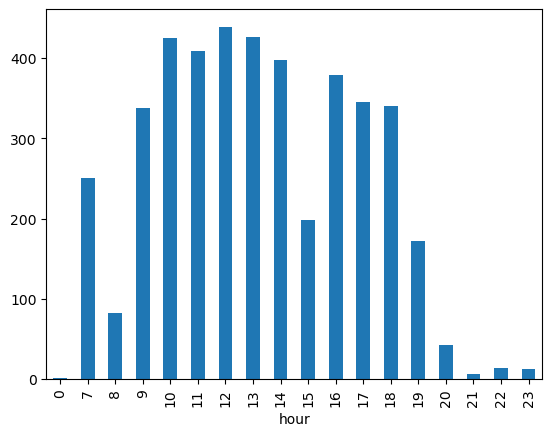

In [346]:
dfs_dt.groupby('hour').size().plot(kind='bar')

In [347]:
dfs_dto = dfs[dfs['from'] == 'Дептранс_Оперативно']

<Axes: xlabel='hour'>

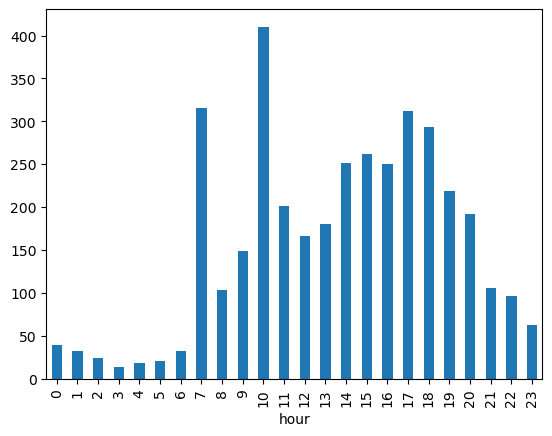

In [348]:
dfs_dto.groupby('hour').size().plot(kind='bar')

Столбчатые диаграммы показывают нам схожую ситуацию, наибольшая активность Дептранс.Оперативно в 7, 10 и 19 часов.

#### Далее я хочу проанализировать сообщения о падении человека на пути. 
Для этого я создаю новый признак 'body' и считаю количество сообщений по дням недели, часу и месяцу.

In [349]:
dfs_dto['body'] = dfs_dto['text'].apply(lambda x: 1 if 'человека на пути' in x else 0)

/var/folders/bm/5gs1kgnj6lq967kw6cprhdqr0000gn/T/ipykernel_22752/2515743219.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs_dto['body'] = dfs_dto['text'].apply(lambda x: 1 if 'человека на пути' in x else 0)


<Axes: xlabel='day_of_week'>

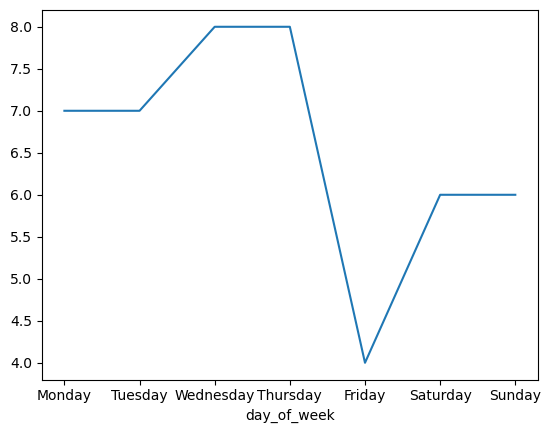

In [350]:
dfs_dto[dfs_dto['body'] == 1].groupby('day_of_week').size().reindex(dorder).plot(kind='line')

In [351]:
dfs_dto[dfs_dto['body'] == 1].groupby('month').size().reindex(morder)


month
             NaN
January      2.0
February     4.0
March        2.0
April        5.0
May          4.0
June         2.0
July         1.0
August       3.0
September    4.0
October      7.0
November     6.0
December     6.0
dtype: float64

<Axes: xlabel='month'>

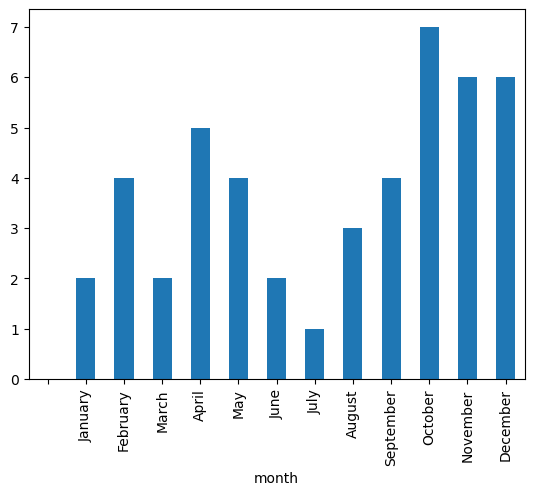

In [352]:
dfs_dto[dfs_dto['body'] == 1].groupby('month').size().reindex(morder).plot(kind="bar")


In [353]:
dfs_dto[dfs_dto['body'] == 1].groupby('hour').size()

hour
0     1
6     2
7     3
8     3
10    2
11    2
12    2
13    1
14    2
15    1
16    3
17    4
18    2
19    8
20    4
21    4
22    2
dtype: int64

<Axes: xlabel='hour'>

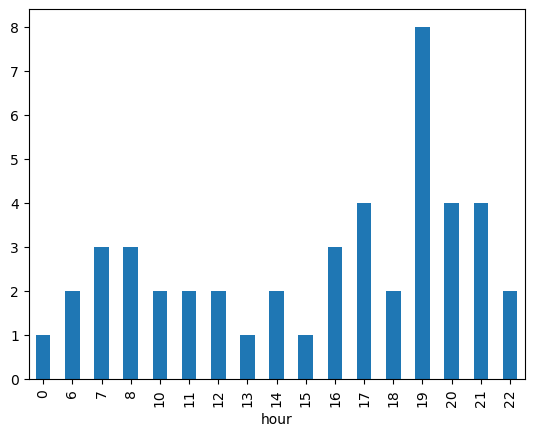

In [354]:
dfs_dto[dfs_dto['body'] == 1].groupby('hour').size().plot(kind='bar')

В итоге было выяснено, что люди чаще всего прыгают под рельсы в 7 часов вечера, в Октябре прыгнуло больше всего людей за последний год, и больше всего прыжков пришлось на среду и четверг.

Далее я узнаю насколько часто авторы каналов о транспорте желают свои читателям Доброе утро.

In [355]:
dfs['GM'] = dfs['text'].apply(lambda x: 1 if 'Доброе утро' in x else 0)

<Axes: xlabel='day_of_week'>

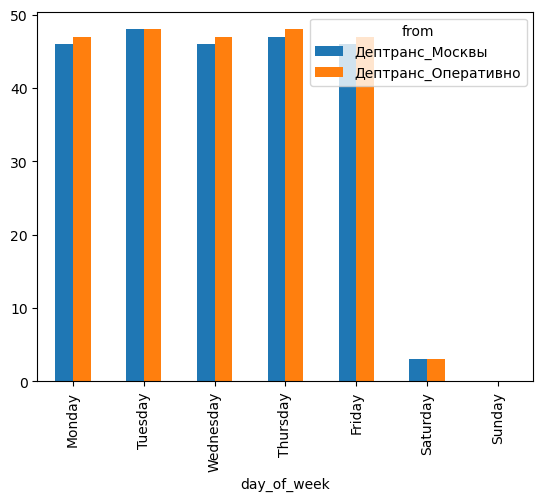

In [356]:
dfs[dfs['GM'] == 1].groupby('day_of_week')['from'].value_counts().unstack().reindex(dorder).plot(kind="bar")

<Axes: xlabel='month'>

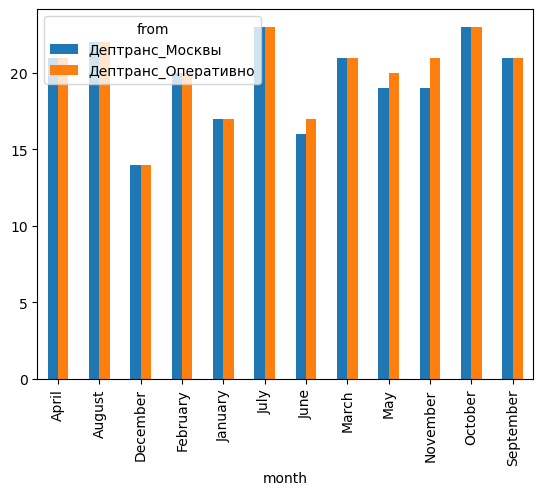

In [357]:
dfs[dfs['GM'] == 1].groupby('month')['from'].value_counts().unstack().plot(kind='bar')

Доброе утро желают авторы канала Дептранс Оперативно и Дептранс Москвы в равной степени только по будням.

In [358]:
dfs_dto['closing'] = dfs_dto['text'].apply(lambda x: 1 if any(substring in x for substring in ['перекрытие', 'закрыто', 'задерживаются', 'Движение', 'недоступно', 'временно']) else 0)

/var/folders/bm/5gs1kgnj6lq967kw6cprhdqr0000gn/T/ipykernel_22752/1184495355.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs_dto['closing'] = dfs_dto['text'].apply(lambda x: 1 if any(substring in x for substring in ['перекрытие', 'закрыто', 'задерживаются', 'Движение', 'недоступно', 'временно']) else 0)


<Axes: xlabel='hour'>

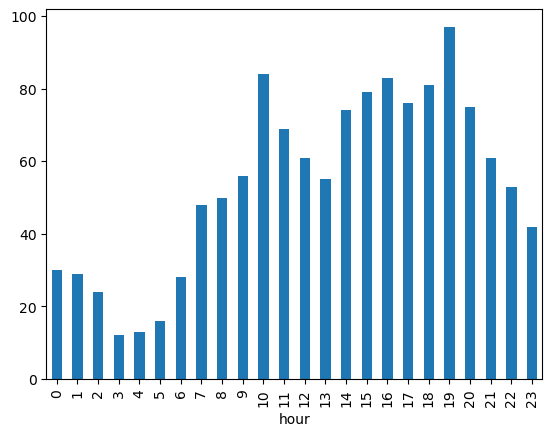

In [359]:
dfs_dto[dfs_dto['closing'] == 1].groupby('hour').size().plot(kind='bar')

 Также больше всего перекрытий, затруднений движений и прочих транспортных проишествий приходится на 10 и 19 часов.